# Image Classification using CNN

In this exercise I will be building a neural network image classification model. I will use a CNN architecture, highly effective for image classification tasks due to their ability to capture spatial hierarchies in images. Let's go!

In [1]:
# Packages to import we will be needing to solve this exercise

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST Dataset
# The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9)

# Load the dataset (downloads if not present)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [4]:
y_train[:2]

array([5, 0], dtype=uint8)

Let's take a look at first five images and their labels!

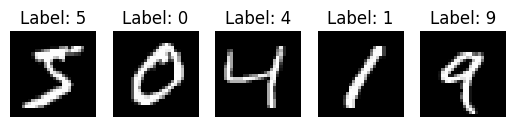

In [5]:
# Plot the first 5 images in the dataset
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide axes
plt.show()


Ahaha funny, that is easy enough to understand the labels. Next we will preprocess our data so that it is ready to train the model.

In [6]:
# Reshape the data to include the channel dimension (since CNNs expect 4D input: (batch_size, height, width, channels))
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))  # 28x28 images with 1 channel (grayscale)
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [7]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
# One-hot encode the labels (e.g., 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [10]:
# Define the CNN Model Architecture
# The model will have 2 convolutional layers, each followed by max pooling.
# After the convolutional layers, we'll flatten the output and add fully connected (dense) layers.

model = Sequential([
    # First Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size to reduce dimensions

    # Second Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Flatten the output to feed it into the dense layers
    Flatten(),

    # Fully Connected (Dense) Layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting (50% of neurons dropped during training)

    # Output Layer with 10 neurons (one for each digit) and softmax activation for classification
    Dense(10, activation='softmax')
])

C:\Users\AJ\antonio_janeiro_venv\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 26, 26, 32)         │            320 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 13, 13, 32)         │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 11, 11, 64)         │         18,496 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 5, 5, 64)           │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten (Flatten)                  │ (None, 1600)               │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                      │ (None, 128)                │        204,928 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                  │ (None, 128)                │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                    │ (None, 10)                 │          1,290 │
└────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8529 - loss: 0.4670 - val_accuracy: 0.9791 - val_loss: 0.0684
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9739 - loss: 0.0911 - val_accuracy: 0.9866 - val_loss: 0.0452
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9799 - loss: 0.0692 - val_accuracy: 0.9887 - val_loss: 0.0418
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9831 - loss: 0.0540 - val_accuracy: 0.9892 - val_loss: 0.0386
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9908 - loss: 0.0301 - val_accuracy: 0.9915 - val_loss: 0.0331
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9915 -

In [13]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0327
Test Accuracy: 0.9916


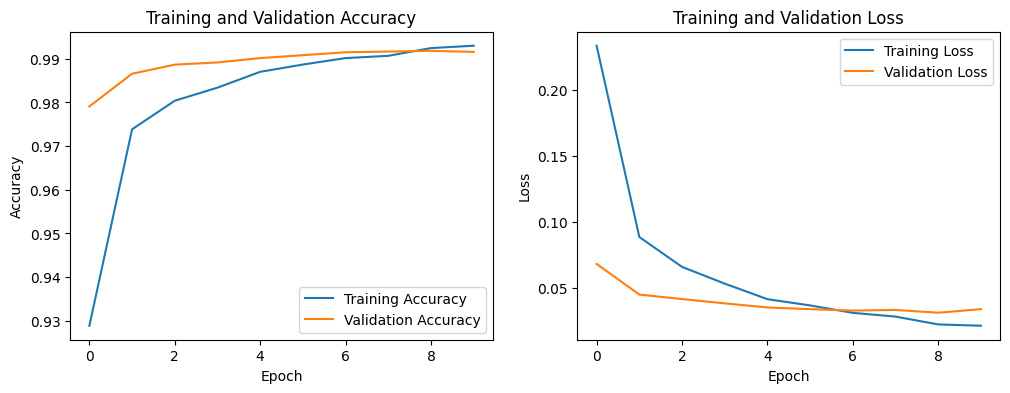

In [14]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


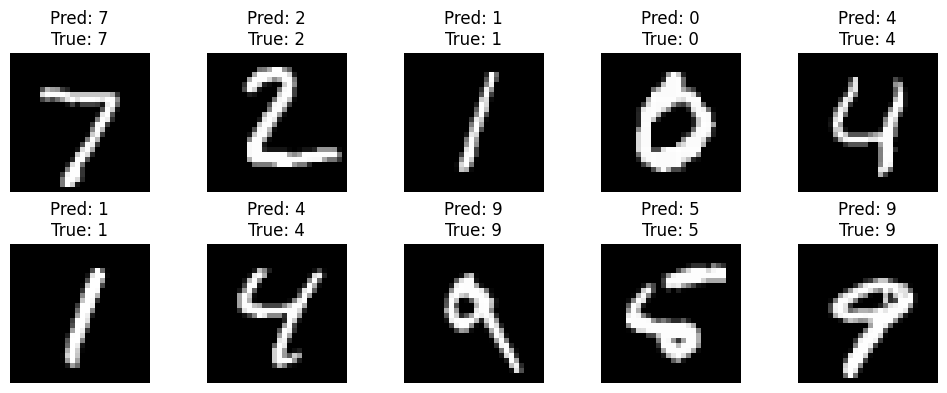

In [15]:
# Predict on a small sample of test images
predictions = model.predict(X_test[:10])

# Plot the images and the predicted labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()